# 3. Design RNN or its variant including LSTM or GRU a) Select a suitable time series dataset. Example – predict sentiments based on product reviews b) Apply for prediction

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/5


C:\Users\21118\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.6332 - loss: 0.6283 - val_accuracy: 0.8110 - val_loss: 0.4136
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.8366 - loss: 0.3866 - val_accuracy: 0.8246 - val_loss: 0.3920
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.8655 - loss: 0.3231 - val_accuracy: 0.8250 - val_loss: 0.3980
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.8872 - loss: 0.2834 - val_accuracy: 0.8282 - val_loss: 0.4011
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.9036 - loss: 0.2509 - val_accuracy: 0.8206 - val_loss: 0.4327
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8244 - loss: 0.4320

Test Accuracy: 0.8256
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.78      0.82     12500
    Positive       0.80      0.87      0.83     12500

    accuracy                           0.83

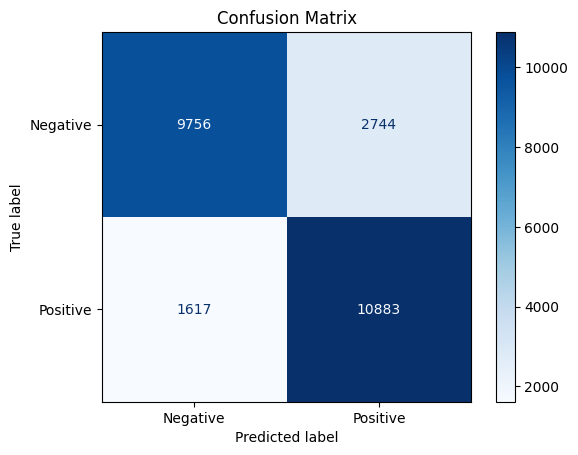

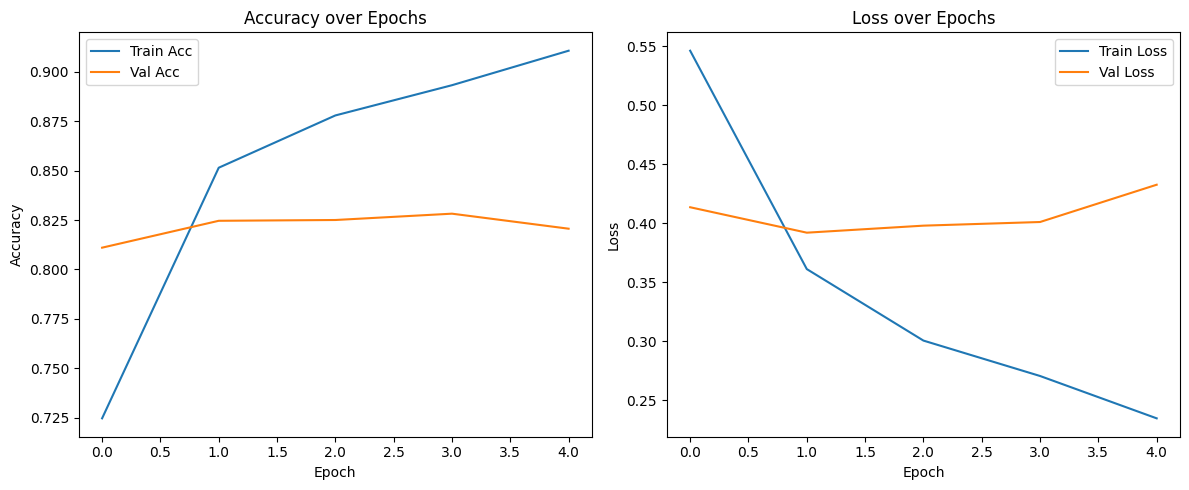

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Set seed for reproducibility
tf.random.set_seed(42)

# 1. Download the IMDB dataset directly from TensorFlow/Keras
num_words = 10000  # Limit the vocabulary to the top 10,000 words
max_length = 100   # Maximum review length (in words)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=num_words)

# 2. Pad sequences to ensure all have the same length
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_length)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_length)

# 3. Build LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=num_words, output_dim=32, input_length=max_length),
    tf.keras.layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 4. Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 5. Train the model (you can also include a validation split)
history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    epochs=5,
                    batch_size=128)

# 6. Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# 7. Make predictions
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# 8. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# 10. Plot Accuracy & Loss over epochs
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()